In [22]:
import numpy as np
import pandas as pd 
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
train = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train.csv')
test = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test.csv')
era = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/era.csv')
sample_submission = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/sample_submission.csv')

In [4]:
cat_ver1_oof = pd.read_csv('cat_ver1_oof.csv')
cat_ver2_oof = pd.read_csv('cat_ver2_oof.csv')

lgb_ver4_oof = pd.read_csv('lgb_ver4_oof.csv')
lgb_ver5_oof = pd.read_csv('lgb_ver5_oof.csv')
lgb_ver8_oof = pd.read_csv('lgb_ver8_oof.csv')

xgb_ver1_oof = pd.read_csv('xgb_ver1_oof.csv')

In [5]:
# oofの平均
df_oof = (cat_ver1_oof["cat_ver1_oof"] + cat_ver2_oof["cat_ver2_oof"] + lgb_ver4_oof["lgb_ver4_oof"] + lgb_ver5_oof["lgb_ver5_oof"] + lgb_ver8_oof["lgb_ver8_oof"] + xgb_ver1_oof["xgb_ver1_oof"]) / 6

In [6]:
df_oof = pd.DataFrame(df_oof, columns=["target"])

In [9]:
df_oof.target.values

array([0.02064485, 0.11461273, 0.36508017, ..., 0.07640363, 0.23026718,
       0.02514092])

In [11]:
def find_optimal_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_score = 0

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        score = f1_score(y_true, y_pred)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return best_threshold, best_score

# 例として使用するデータ（実際にはモデルからの予測値と実際のラベルを使用）
y_true = train['is_kokuhou'].values
y_scores = df_oof.target.values

best_threshold, best_f1_score = find_optimal_threshold(y_true, y_scores)
print(f"Best threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

Best threshold: 0.17171717171717174
Best F1 Score: 0.3771331058020478


In [13]:
cat_ver1_test = pd.read_csv('cat_ver1_test.csv')
cat_ver2_test = pd.read_csv('cat_ver2_test.csv')

lgb_ver4_test = pd.read_csv('lgb_ver4_test.csv')
lgb_ver5_test = pd.read_csv('lgb_ver5_test.csv')
lgb_ver8_test = pd.read_csv('lgb_ver8_test.csv')

xgb_ver1_oof = pd.read_csv('xgb_ver1_test.csv')

In [14]:
#　予測値の平均を取る
df_test = (cat_ver1_test["cat_ver1_test"] + cat_ver2_test["cat_ver2_test"] + lgb_ver4_test["lgb_ver4_test"] + lgb_ver5_test["lgb_ver5_test"] + lgb_ver8_test["lgb_ver8_test"] + xgb_ver1_oof["xgb_ver1_test"]) / 6

In [15]:
df_test = pd.DataFrame(df_test, columns=["target"])

In [16]:
df_test.target.values

array([0.02182654, 0.22375342, 0.37755011, ..., 0.15299073, 0.02688222,
       0.01984194])

In [17]:
# 閾値を超える確率を持つ要素を1に、それ以外を0に変換
y_pred = (df_test.target.values > best_threshold).astype(int)
print(y_pred)
print(y_pred.shape)

[0 1 1 ... 0 0 0]
(10065,)


In [18]:
sample_submission['is_kokuhou'] = y_pred
sample_submission

,is_kokuhou
0,0
1,1
2,1
3,0
4,0
...,...
10060,0
10061,0
10062,0
10063,0


In [19]:
sample_submission["is_kokuhou"].value_counts()

0    8972
1    1093
Name: is_kokuhou, dtype: int64

In [20]:
sample_submission.to_csv('ensemble_6model.csv', index=False)

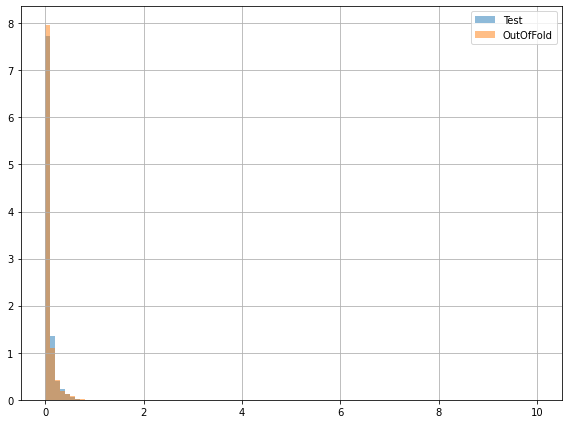

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

vmax = .02
bins = np.linspace(0, 10, 100)
ax.hist(df_test.target.values, bins=bins, density=True, alpha=.5, label="Test")
ax.hist(df_oof.target.values, bins=bins, density=True, alpha=.5, label="OutOfFold")
ax.grid()
ax.legend()
# ax.set_title("テストと学習時の予測傾向差分")

fig.tight_layout()